In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('Fig.jpg')

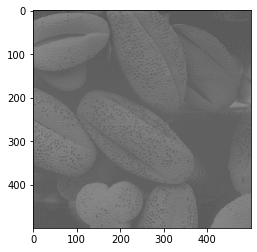

In [2]:
plt.imshow(img,cmap='gray')

### Convert image to 1D array

In [3]:
img_arr=img.ravel()
print(img_arr, " size =", img_arr.size)

[ 91  91  91 ... 118 118 118]  size = 750000


### Plot histogram

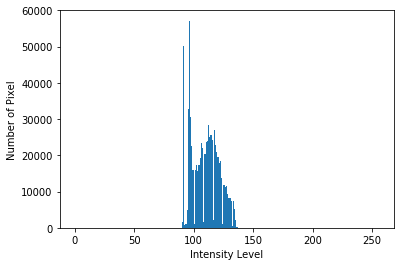

In [4]:
plt.hist(img_arr,256,[0,256])
plt.xlabel('Intensity Level')
plt.ylabel('Number of Pixel')
plt.show()

### Defining an array sum function

In [5]:
def sum_arr(array):
    sum = 0
    for i in range(array.size):
        sum = sum + array[i]
    return sum

### Defining a histogram function

In [6]:
def hist_arr(image, bins):
    histogram = np.zeros(bins)
    #print("hist size",histogram.size)
    pixel_c = 0
    for pixel in image:
        pixel_c += 1
        histogram[pixel] += 1
    #print("pixel cnt",pixel_c)
    return histogram

### Defining a cumulative sum function

In [7]:
def cumu_sum_arr(array):
    cumu_arr = np.zeros(array.size)
    cumu_arr[0] = array[0]
    for i in range(1,array.size):
        cumu_arr[i] = cumu_arr[i-1] + array[i]
    return cumu_arr

### Plot Histogram using the histogram function [256 bins]

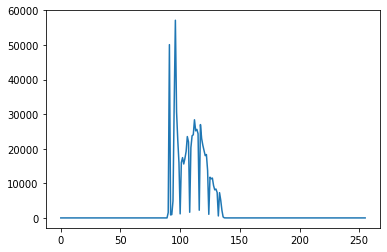

In [8]:
img_hist=hist_arr(img_arr,256)
plt.plot(img_hist)
plt.show()

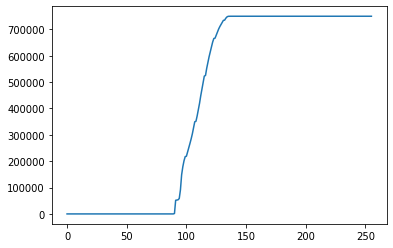

In [9]:
plt.plot(cumu_sum_arr(img_hist))

### Plot a normalized histogram / PDF

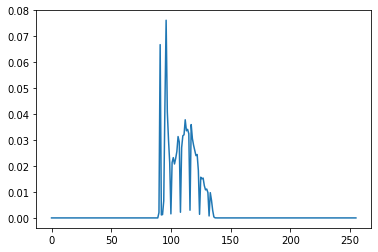

sum of normalized histogram = 1.0000000000000002


In [10]:
img_hist_norm = img_hist/img_arr.size
plt.plot(img_hist_norm)
plt.show()
print("sum of normalized histogram =", sum_arr(img_hist_norm))

### Calculating and plotting CDF

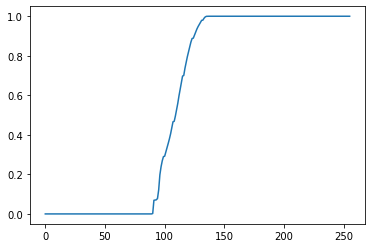

In [11]:
img_cumu_sum = cumu_sum_arr(img_hist_norm)
plt.plot(img_cumu_sum)

### CDF * 256 [Rescaling CDF]

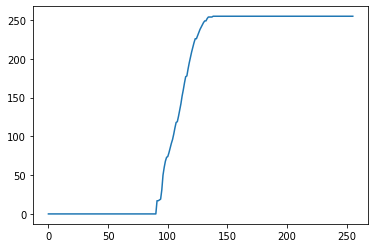

In [12]:
img_cdf_rescale=img_cumu_sum*255
img_cdf_rescale = img_cdf_rescale.astype('uint8')
plt.plot(img_cdf_rescale)

### Creating equalized image

In [13]:
img_eq_arr = img_cdf_rescale[img_arr]
print(img_eq_arr)

[ 17  17  17 ... 195 195 195]


#### Histogram after contrast streching

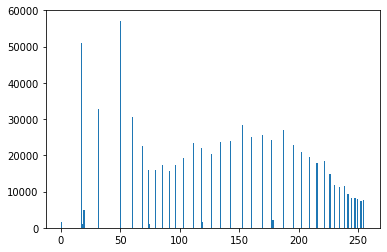

In [14]:
plt.hist(img_eq_arr,256,[0,256])
plt.show()

#### Image after contrast stretching

True

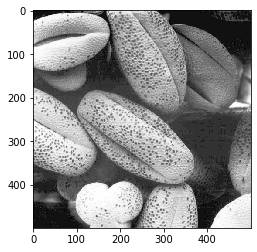

In [15]:
img_equalized = np.reshape(img_eq_arr, img.shape)
plt.imshow(img_equalized,cmap='gray')
cv2.imwrite('eq1.jpg', img_equalized)

### Preview Side-by-Side

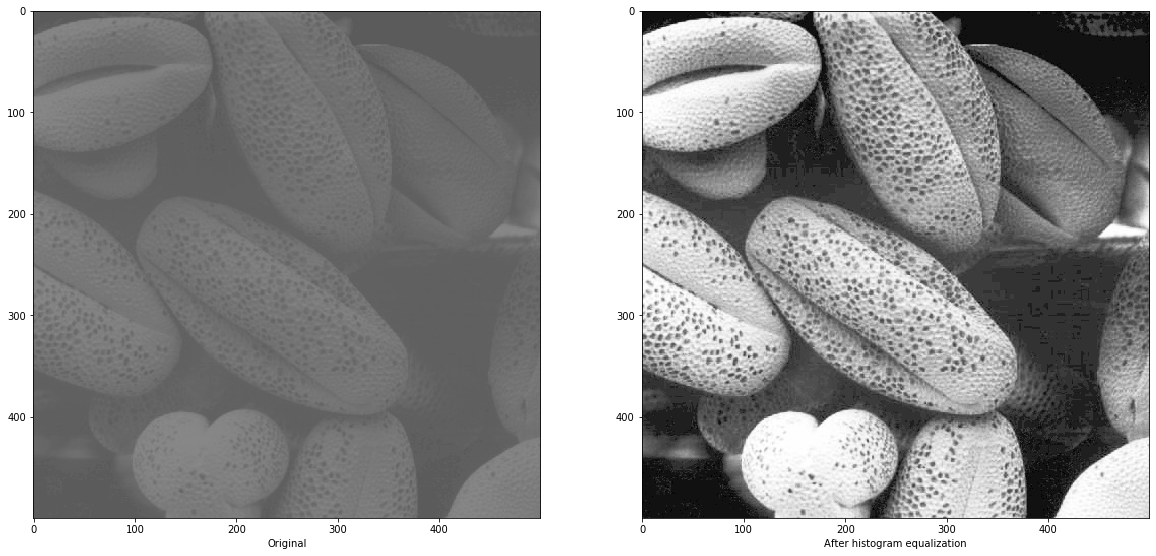

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.xlabel('Original')

plt.subplot(1,2,2)
plt.imshow(img_equalized,cmap='gray')
plt.xlabel('After histogram equalization')

plt.show()